In [102]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [103]:
!pwd

/home/anneconstance/code/migasar/kaggle-wagon552-shopee/notebooks


In [104]:
df = pd.read_csv('../raw_data/train.csv')

In [105]:
df.head()

,posting_id,image,image_phash,title,label_group
0,train_129225211,0000a68812bc7e98c42888dfb1c07da0.jpg,94974f937d4c2433,Paper Bag Victoria Secret,249114794
1,train_3386243561,00039780dfc94d01db8676fe789ecd05.jpg,af3f9460c2838f0f,"Double Tape 3M VHB 12 mm x 4,5 m ORIGINAL / DO...",2937985045
2,train_2288590299,000a190fdd715a2a36faed16e2c65df7.jpg,b94cb00ed3e50f78,Maling TTS Canned Pork Luncheon Meat 397 gr,2395904891
3,train_2406599165,00117e4fc239b1b641ff08340b429633.jpg,8514fc58eafea283,Daster Batik Lengan pendek - Motif Acak / Camp...,4093212188
4,train_3369186413,00136d1cf4edede0203f32f05f660588.jpg,a6f319f924ad708c,Nescafe \xc3\x89clair Latte 220ml,3648931069


In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34250 entries, 0 to 34249
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   posting_id   34250 non-null  object
 1   image        34250 non-null  object
 2   image_phash  34250 non-null  object
 3   title        34250 non-null  object
 4   label_group  34250 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 1.3+ MB


In [107]:
df.describe()

,label_group
count,3.425000e+04
mean,2.128611e+09
std,1.234630e+09
min,2.580470e+05
25%,1.050720e+09
50%,2.120410e+09
75%,3.187910e+09
max,4.294197e+09


In [108]:
df['image'].shape

(34250,)

In [109]:
# labels = ['posting_id', 'image', 'image_phash', 'title', 'label_group']
# for label in labels: 
#     print(f"Unique values for {label} :", df[label].nunique())
df.nunique()

posting_id     34250
image          32412
image_phash    28735
title          33117
label_group    11014
dtype: int64

In [110]:
df.isna().sum()

posting_id     0
image          0
image_phash    0
title          0
label_group    0
dtype: int64

In [111]:
pip install scikit-image

Note: you may need to restart the kernel to use updated packages.


In [112]:
from skimage import io
import os

In [113]:
filename = os.path.abspath(os.path.join('../raw_data/train_images', '3428ce52a9c43505865d2bdefab028fc.jpg'))
filename

'/home/anneconstance/code/migasar/kaggle-wagon552-shopee/raw_data/train_images/3428ce52a9c43505865d2bdefab028fc.jpg'

In [114]:
img = io.imread(filename)
img.shape

(640, 640, 3)

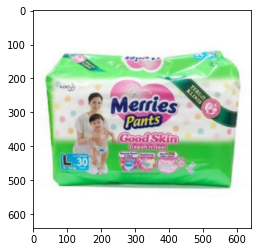

In [115]:
plt.imshow(img)

In [116]:
filename = os.path.abspath(os.path.join('../raw_data/train_images', '00b116ee1a2f59352756dceddf542943.jpg'))
filename

'/home/anneconstance/code/migasar/kaggle-wagon552-shopee/raw_data/train_images/00b116ee1a2f59352756dceddf542943.jpg'

In [117]:
img = io.imread(filename)
img.shape

(750, 750, 3)

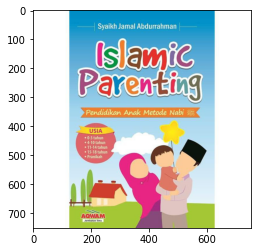

In [118]:
plt.imshow(img)

In [119]:
filename = os.path.abspath(os.path.join('../raw_data/train_images', 'b3651c76ca2d28e1b914e31c4c6588ae.jpg'))
filename

'/home/anneconstance/code/migasar/kaggle-wagon552-shopee/raw_data/train_images/b3651c76ca2d28e1b914e31c4c6588ae.jpg'

In [120]:
img = io.imread(filename)
img.shape

(686, 686, 3)

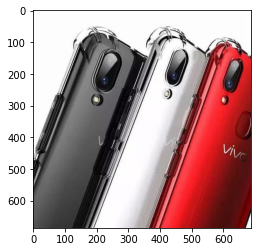

In [121]:
plt.imshow(img)

# Image preprocessing

## Resizing

We want to reshape the images in smaller size (state-of-the-art networks are trained on (224,224,3) images / tensors)

In [122]:
images = [image for image in df['image']]
for image in images:
    image_path =  f'{image}'
    filename = os.path.abspath(os.path.join('../raw_data/train_images', image_path))
    img = io.imread(filename)
    img.reshape((224, 224, 3), order='C')

ValueError: cannot reshape array of size 3145728 into shape (224,224,3)

## Intensity normalization

Neural networks converge faster if the inputs are somewhat normalized. Therefore we want to transform the image pixels with values between 0 and 255 (for each color) into values between -1 and 1, thanks to Keras libraries (or just by dividing all the data by 255)

## Data augmentation

Creation of additionnal data to explore : 
- Mirror
- Crop
- rotations
- slight transformation of the colors
- change of the textures
- "photoshop effects": blur, halo, ...
- deformations
- ...

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Reshape

model = Sequential()
model.add(Reshape((5*5*1,), input_shape=(5,5,1)))  # This flattens the (5, 5, 1) image to a vector of size 25
model.add(Dense(100, activation='relu'))
model.add(Dense(10, activation='softmax')) 

# Preprocessing on titles 

In [89]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


- Lowercase
- remove numbers
- remove punctuation
- remove stop words
- select important words with stemmer

In [127]:
import string 
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer


def text_preproc(title):
    titles = []
    title = str(title).lower()
    title = ''.join(word for word in title if not word.isdigit())
    string.punctuation
    for punctuation in string.punctuation:
        title = str(title).replace(punctuation, '')
        stop_words = set(stopwords.words('english')) 
        word_tokens = word_tokenize(title) 
        title = [w for w in word_tokens if not w in stop_words]
        stemmer = PorterStemmer()
        stemmed = [stemmer.stem(word) for word in title]
        titles.append(title)
    return titles

In [ ]:
title = df['title']
text_preproc(title)